In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data= pd.read_csv("sgemm_product.csv")
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [3]:
data["Avg_Run"]=data[["Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"]].mean(axis=1)
data=data.drop(columns=["Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"],axis=1)
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Avg_Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [4]:
data["Class"]= np.where(data["Avg_Run"]>np.median(data["Avg_Run"]),1,0)
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Avg_Run,Class
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650,1
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625,1


In [5]:
from sklearn.model_selection import train_test_split

def data_part(X, y, split_size) :
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = split_size)
    print(X_train.shape)
    print(X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [6]:
X= data.drop(["Avg_Run","Class"],axis=1)
y=data["Class"]

In [7]:
X_train, X_test, y_train, y_test=data_part(X,y,split_size=0.2)

(193280, 14)
(48320, 14)


In [8]:
from sklearn.model_selection import GridSearchCV

def model_building(X, y, test, model, params = None, k = 1) :
    
    if params == None :
        
        ## Fit model 
        model.fit(X, y)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X), model.predict(test))
    
    else :
        
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        
        ## Fit model_cv using 
        model_cv.fit(X,y)
        
        ## check best estimator 
        model = model_cv.best_estimator_
        
        print(model_cv.best_estimator_)
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(test))

In [9]:
def model_evaluation(y_train, pred_train, y_test, pred_test) :
    
    print('''
            =========================================
               Accuracy FOR TRAIN DATA
            =========================================''')
    print("Accuracy : ", accuracy_score(y_train, pred_train))
    
    print('''
            =========================================
               Accuracy FOR TEST DATA
            =========================================''')
    print("Accuracy : ", accuracy_score(y_test, pred_test))

In [15]:
estimator= MLPClassifier(random_state=42,early_stopping=True,solver="adam")
parameters={
'hidden_layer_sizes': [(100,50,25,), (100,50,)],
'alpha': [0.1,0.01,.001],
'activation': ["logistic", "relu", "tanh"]
}

## Hyperparameter Tuning using Grid Search to obtain best parameters for Neural Network

In [16]:
model_cv, model, pred_train, pred_test = model_building(X_train, y_train,X_test, estimator, parameters, 5)
print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
print(model_cv.best_params_, '\n\n')

MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 25), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
			 MLPClassifier 

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50, 25)} 




In [17]:
model_evaluation(y_train, pred_train, y_test, pred_test)


               Accuracy FOR TRAIN DATA
Accuracy :  0.985885761589404

               Accuracy FOR TEST DATA
Accuracy :  0.9828021523178808


## Obtaining Optimal value of No. Of Epochs as per Accuracy

In [22]:
accuracy_tr=[]
accuracy_te=[]
epochs=[5,10,20,30,50,80,100,120,150,180,200,230,250,280,300,330,370,400,420,480,500]
for i in epochs:
    Neural_Net= MLPClassifier(max_iter=i,random_state=42,early_stopping=True,solver="adam",activation='tanh', alpha=0.001, hidden_layer_sizes= (100, 50, 25,))
    Neural_Net.fit(X_train,y_train)
    Pred_train= Neural_Net.predict(X_train)
    Training_Acc= accuracy_score(y_train,Pred_train)
    Pred_test= Neural_Net.predict(X_test)
    Testing_Acc= accuracy_score(y_test,Pred_test)
    accuracy_tr.append(Training_Acc)
    accuracy_te.append(Testing_Acc)   

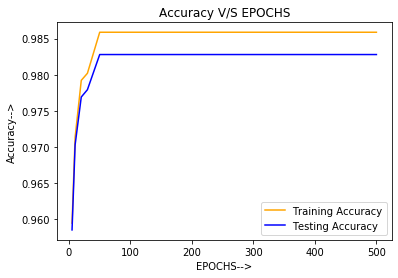

In [23]:
plt.plot(epochs,accuracy_tr,color="orange",label="Training Accuracy")
plt.plot(epochs,accuracy_te,color="blue",label="Testing Accuracy")
plt.title("Accuracy V/S EPOCHS")
plt.xlabel("EPOCHS-->")
plt.ylabel("Accuracy-->")
plt.legend()
plt.show()


## Modeling Neural Network using best parameters

In [41]:
NN= MLPClassifier(max_iter=50,random_state=42,early_stopping=True,solver="adam",activation='tanh', alpha=0.001, hidden_layer_sizes= (100, 50, 25,))
NN.fit(X_train,y_train)
nn_tr_pred= NN.predict(X_train)
nn_te_pred= NN.predict(X_test)
training_acc_nn= accuracy_score(y_train,nn_tr_pred)
testing_acc_nn= accuracy_score(y_test,nn_te_pred)

## Training and Test Accuracies

In [44]:
print("Training Accuracy : Neural Network =",(training_acc_nn)*100,"%")
print("Test Accuracy : Neural Network =",(testing_acc_nn)*100,"%")

Training Accuracy : Neural Network = 98.5885761589404 %
Test Accuracy : Neural Network = 98.28021523178808 %


## ROC Curve

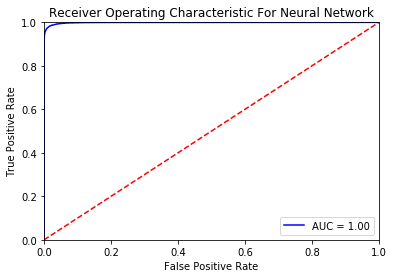

In [45]:
probs_NN = NN.predict_proba(X_test)
preds_NN = probs_NN[:,1]
fpr_NN, tpr_NN, threshold_NN = metrics.roc_curve(y_test, preds_NN)
roc_auc_NN = metrics.auc(fpr_NN, tpr_NN)


plt.title('Receiver Operating Characteristic For Neural Network')
plt.plot(fpr_NN, tpr_NN, 'b', label = 'AUC = %0.2f' % roc_auc_NN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Confusion Matrix

In [47]:
confusion_matrix(y_test,nn_te_pred,labels=[0,1])

array([[23929,   318],
       [  513, 23560]], dtype=int64)

## Hyperparameter Tuning using 5-Fold CV for find Optimal K

In [34]:
accuracy_CV=[]
for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_CV.append(scores.mean()) 

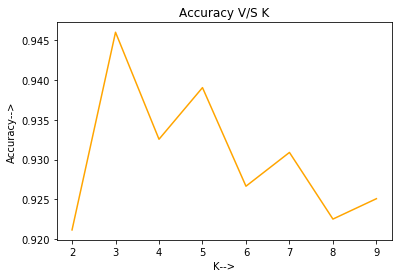

In [35]:
plt.plot(list(range(2,10)),accuracy_CV,color="orange",label="Accuracy")
plt.title("Accuracy V/S K")
plt.xlabel("K-->")
plt.ylabel("Accuracy-->")
plt.show()


## Modeling KNN- Classifier Using Optimal K 

In [36]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
knn_tr_pred= KNN.predict(X_train)
knn_te_pred= KNN.predict(X_test)
training_acc_knn= accuracy_score(y_train,knn_tr_pred)
testing_acc_knn= accuracy_score(y_test,knn_te_pred)

In [48]:
print("Training Accuracy : KNN =",(training_acc_knn)*100,"%")
print("Test Accuracy : KNN =",(testing_acc_knn)*100,"%")

Training Accuracy : KNN = 98.18087748344371 %
Test Accuracy : KNN = 95.42011589403974 %


## ROC Curve

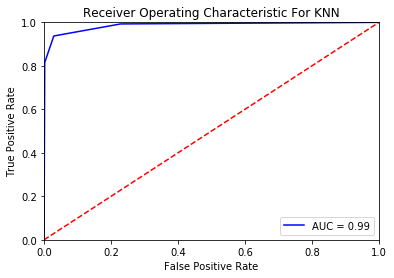

In [39]:
probs_KNN = KNN.predict_proba(X_test)
preds_KNN = probs_KNN[:,1]
fpr_KNN, tpr_KNN, threshold_KNN = metrics.roc_curve(y_test, preds_KNN)
roc_auc_KNN = metrics.auc(fpr_KNN, tpr_KNN)


plt.title('Receiver Operating Characteristic For KNN')
plt.plot(fpr_KNN, tpr_KNN, 'b', label = 'AUC = %0.2f' % roc_auc_KNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Confusion Matrix

In [40]:
confusion_matrix(y_test,knn_te_pred,labels=[0,1])

array([[23542,   705],
       [ 1508, 22565]], dtype=int64)